In [132]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [133]:
class SearchAlgorithms:
    def stochasticHillClimbing(problem, stuckIterations=10):
        current = problem.initialState()
        oldNeighbor = current.copy()

        stuck = 0
        while True:
            neighbor = problem.bestNeighbor(current)  # Obtain best neighbor state from current one
            # print(neighbor, current, '|', problem.stateValue(neighbor), problem.stateValue(current))

            # Check if it's stuck in an infinite loop
            if np.array_equal(neighbor, oldNeighbor):
                stuck += 1
            else:
                stuck = 0

            # Return state if it's stuck in a local maximum or in a loop
            if problem.stateValue(neighbor) < problem.stateValue(current) or stuck > stuckIterations:
                # print(current, problem.stateValue(current))
                return current

            oldNeighbor = current.copy()
            current = neighbor.copy()

    def hillClimbingWithRandomRestart(problem):
        solution = None

        while True:
            # Obtain solution from stochastic hill climbing
            solution = SearchAlgorithms.stochasticHillClimbing(problem)
            # Return solution state if it's in a global maximum
            if problem.stateValue(solution) == problem.maxValue:
                print('Solution state:', solution, '|', problem.stateValue(solution))
                return solution

    def simulatedAnnealing(problem, schedule):
        current = problem.initialState()
        t = 0

        while True:
            t += 1
            T = schedule(t)

            if T == 0:
                return current

            neighbor = problem.randomNeighbor(current)
            deltaE = problem.stateValue(neighbor) - problem.stateValue(current)

            if deltaE > 0 or rnd.random() <= math.exp(deltaE/T):
                current = neighbor.copy()

In [134]:
class NQueens:
    def __init__(self, N):
        self.N = N
        self.maxValue = 0
        # self.state = np.array([i for i in range(1, self.N+1)])
        # np.random.shuffle(self.state)
        self.state = np.array([rnd.randint(1, self.N) for i in range(self.N)])
        print('Start state:', self.state)

    def initialState(self):
        return self.state

    def randomNeighbor(self, state):
        col = rnd.randint(0, self.N-1)
        row = state[col]
        newRow = rnd.randint(1, self.N)

        while newRow == row:
            newRow = rnd.randint(1, self.N)

        state[col] = newRow
        return state

    def bestNeighbor(self, state):
        bestState = state.copy()
        bestState[0] = self.N+1 - bestState[0]  # Change the first queen
        bestValue = self.stateValue(bestState)

        cols = np.array([i for i in range(self.N)])
        np.random.shuffle(cols)

        for col in cols:
            newState = state.copy()
            for row in range(1, self.N+1):
                if row != state[col]:
                    newState[col] = row
                    newValue = self.stateValue(newState)
                    if newValue >= bestValue:
                        bestState = newState.copy()
                        bestValue = newValue

        return bestState

    def stateValue(self, state):
        value = 0

        for i in range(self.N - 1):
            for j in range(i+1, self.N):
                if state[j] == state[i] or abs(state[j] - state[i]) == j - i:
                    value += 1

        value *= -1
        return value

In [135]:
class TravellingSalesman:
    def __init__(self, N, size=100):
        self.N = N
        self.state = []

        for i in range(N):
            # Check that every city is different
            city = (rnd.randint(0, size), rnd.randint(0, size))
            while city in self.state:
                city = (rnd.randint(0, size), rnd.randint(0, size))

            self.state.append(city)

        print('Start state:', self.state)

        plt.plot(*zip(*self.state), 'o-')
        for i in range(self.N):
            plt.annotate(i+1, (self.state[i][0], self.state[i][1]))
        plt.show()

    def initialState(self):
        return self.state

    def distanceBetweenCities(self, city1, city2):
        return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

    def randomNeighbor(self, state):
        return

    def bestNeighbor(self, state):
        return

    def stateValue(self, state):
        distance = 0
        for i in range(self.N-1):
            distance += self.distanceBetweenCities(state[i], state[i+1])
        return distance


Start state: [(14, 18), (40, 32), (65, 3), (48, 10), (73, 12), (29, 98), (81, 7), (52, 39), (83, 69), (86, 56)]


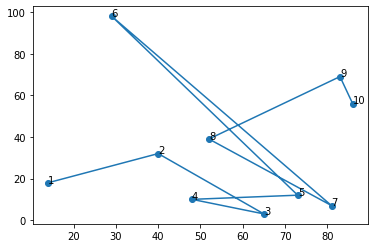

412.3609214589377


In [168]:
if __name__ == '__main__':
	x = TravellingSalesman(10)
	print(x.stateValue(x.initialState()))
	# SearchAlgorithms.hillClimbingWithRandomRestart(NQueens(20))